Import Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully.")


Libraries imported successfully.


Load Datasets

In [49]:
# Load datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

# Print sample data
print("\nCustomers Dataset:")
print(customers_df.head())

print("\nProducts Dataset:")
print(products_df.head())

print("\nTransactions Dataset:")
print(transactions_df.head())



Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

### Data Preprocessing
In this section, we merge the customer data with transaction data based on `CustomerID`. We also convert date columns to `datetime` format to ensure they can be used effectively for time-based analyses in the future.


Data Preprocessing

In [57]:
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge customer data with transaction data
customer_transactions = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

print("Data preprocessing completed. First few rows after merge:")
print(customer_transactions.head())


Data preprocessing completed. First few rows after merge:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price         Region  
0      300.68  300.68         Europe  
1      300.68  300.68           Asia  
2      300.68  300.68         Europe  
3      601.36  300.68  South America  
4      902.04  300.68         Europe  


### Feature Engineering
We create features that summarize each customer's purchasing behavior. These features include:
- `TotalValue`: The total amount spent by the customer.
- `Quantity`: The total quantity of products purchased.
- `TransactionID`: The count of unique transactions made by the customer.

These features will help us identify patterns in customer behavior that we can use to find similar customers.


Create Features: Total Revenue, Quantity Purchased, and Unique Transactions

In [58]:
# Create customer features based on transactions
customer_features = customer_transactions.groupby('CustomerID').agg(
    TotalValue=('TotalValue', 'sum'),
    Quantity=('Quantity', 'sum'),
    TransactionID=('TransactionID', 'nunique'),
    Region=('Region', 'first')
).reset_index()

print("Customer features created. First few rows:")
print(customer_features.head())


Customer features created. First few rows:
  CustomerID  TotalValue  Quantity  TransactionID         Region
0      C0001     3354.52        12              5  South America
1      C0002     1862.74        10              4           Asia
2      C0003     2725.38        14              4  South America
3      C0004     5354.88        23              8  South America
4      C0005     2034.24         7              3           Asia


Feature Scaling (Standardization)

In [59]:
# Feature Scaling (Standardize features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'TransactionID']])

# Display scaled features (first 5 rows)
print("Scaled features:")
print(pd.DataFrame(scaled_features, columns=['TotalValue', 'Quantity', 'TransactionID']).head())


Scaled features:
   TotalValue  Quantity  TransactionID
0   -0.061701 -0.122033      -0.011458
1   -0.877744 -0.448000      -0.467494
2   -0.405857  0.203934      -0.467494
3    1.032547  1.670787       1.356650
4   -0.783929 -0.936951      -0.923530


### Cosine Similarity Calculation
Cosine similarity is used to measure the similarity between customers based on their purchasing behavior. The cosine similarity score ranges from -1 (completely dissimilar) to 1 (completely similar). We use scaled features to ensure that the differences in feature magnitudes do not skew the similarity calculation.


Cosine Similarity Calculation

In [60]:
# Calculate similarity using Cosine Similarity
cosine_sim = cosine_similarity(scaled_features)

# Convert the cosine similarity matrix into a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_features['CustomerID'], columns=customer_features['CustomerID'])

print("Cosine similarity matrix created. First few rows:")
print(cosine_sim_df.head())


Cosine similarity matrix created. First few rows:
CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.762894  0.061624 -0.864394  0.824599 -0.061862   
C0002       0.762894  1.000000  0.679972 -0.879165  0.921692 -0.132043   
C0003       0.061624  0.679972  1.000000 -0.457964  0.559830  0.059867   
C0004      -0.864394 -0.879165 -0.457964  1.000000 -0.992368 -0.268573   
C0005       0.824599  0.921692  0.559830 -0.992368  1.000000  0.225409   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.757220 -0.554108  0.917169  0.539023  ...  0.963752  0.904748   
C0002       0.850143 -0.698040  0.942102  0.952022  ...  0.856197  0.957016   
C0003       0.556169 -0.589973  0.449805  0.832965  ...  0.205610  0.480256   
C0004      -0.982681  0.888752 -0.97

### Recommendation Function for Lookalike Customers
We define a function that identifies the top 3 most similar customers (lookalikes) for a given customer based on cosine similarity. We exclude the customer itself from the recommendations.


Recommendation Function for Lookalike Customers

In [61]:
# Function to recommend top 3 lookalikes based on cosine similarity
def recommend_lookalikes(customer_id, top_n=3):
    similar_scores = cosine_sim_df[customer_id].sort_values(ascending=False)
    top_lookalikes = similar_scores.iloc[1:top_n+1]  # Exclude the customer itself
    return pd.DataFrame({
        'CustomerID': top_lookalikes.index,
        'SimilarityScore': top_lookalikes.values
    })

# Example for customer 'C0001'
print("Top lookalikes for customer 'C0001':")
print(recommend_lookalikes('C0001'))


Top lookalikes for customer 'C0001':
  CustomerID  SimilarityScore
0      C0164         0.997598
1      C0103         0.995394
2      C0069         0.986073


Get Top 3 Lookalikes for Customers and Combine Results

In [62]:
# Get top 3 lookalikes for customers with IDs C0001 to C0020
lookalike_results = []
for customer_id in customer_features['CustomerID'].iloc[:20]:
    recommendations = recommend_lookalikes(customer_id)
    lookalike_results.append(recommendations)

# Combine all results into one DataFrame
lookalike_df = pd.concat(lookalike_results, keys=customer_features['CustomerID'].iloc[:20], names=['CustomerID', 'Rank'])

print("Top 3 lookalikes for customers (C0001 to C0020):")
print(lookalike_df.head())


Top 3 lookalikes for customers (C0001 to C0020):
                CustomerID  SimilarityScore
CustomerID Rank                            
C0001      0         C0164         0.997598
           1         C0103         0.995394
           2         C0069         0.986073
C0002      0         C0029         0.999754
           1         C0031         0.998986


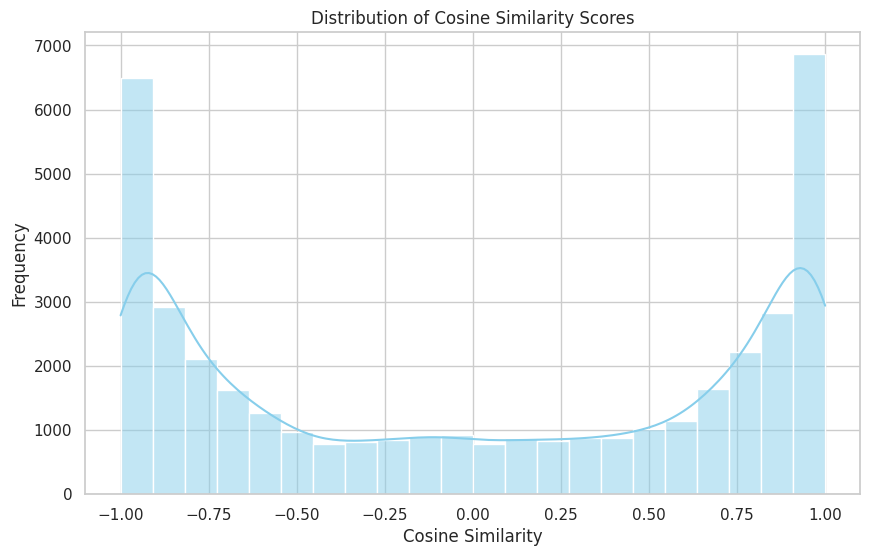

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of cosine similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(cosine_sim.flatten(), kde=True, color='skyblue')
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


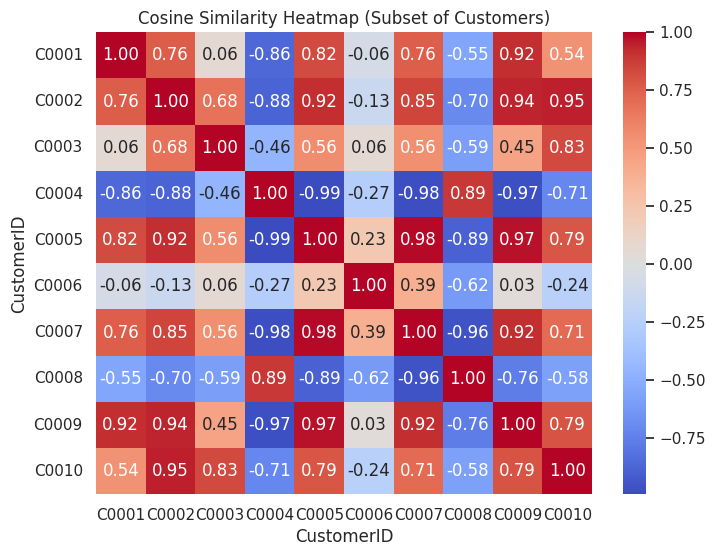

In [65]:
# Select a subset of customers for visualization
subset_customers = customer_features['CustomerID'].iloc[:10]
subset_cosine_sim = cosine_sim_df.loc[subset_customers, subset_customers]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_cosine_sim, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cosine Similarity Heatmap (Subset of Customers)")
plt.xlabel("CustomerID")
plt.ylabel("CustomerID")
plt.show()


Save Results to CSV

In [67]:
# Save results to a CSV file
lookalike_df.to_csv('/content/Sushant_Kothari_Lookalike.csv', index=False)

# Read the saved CSV file
lookalike_df_saved = pd.read_csv('/content/Sushant_Kothari_Lookalike.csv')

# Display the saved DataFrame
print("Lookalike data saved to CSV and loaded back:")
print(lookalike_df_saved.head())


Lookalike data saved to CSV and loaded back:
  CustomerID  SimilarityScore
0      C0164         0.997598
1      C0103         0.995394
2      C0069         0.986073
3      C0029         0.999754
4      C0031         0.998986


In [66]:
import os

# Check if the file exists
file_path = '/content/Sushant_Kothari_Lookalike.csv'
if os.path.exists(file_path):
    print(f"File saved successfully at {file_path}")
else:
    print("File saving failed.")


File saved successfully at /content/Sushant_Kothari_Lookalike.csv


### Conclusion
We have successfully built a Lookalike Model for customer segmentation. Using the cosine similarity between customers based on their transaction behavior, we recommended the top 3 most similar customers for each customer in the dataset. The results were saved in a CSV file and are ready for further analysis.
